# Importation des données

In [1]:
import os
import string
import re
import math 
from math import sqrt
import numpy as np
import random
random.seed(1)


os.chdir('/Users/alainquartierlatente/Desktop/Ensae/StatApp')
print(string.punctuation + "'’")
def mise_en_forme_phrase (phrase):
    phrase = phrase.lower()
    # On elève la ponctuation mais ça peut se discuter (garder les @ et #?)
    phrase = re.sub('( @[^ ]*)|(^@[^ ]*)',"nickname", phrase) #Remplace @... par nickname
    phrase = phrase.translate(str.maketrans('', '', string.punctuation + "'’"))
    # On enlève les passages à la ligne
    phrase = re.sub('\\n', ' ', phrase)
    # On enlève les espaces multiples et les espaces à la fin des phrases
    phrase = re.sub(' +', ' ', phrase)
    phrase = re.sub(' +$', '', phrase)
    return(phrase.split())
#f = open('data/sample_3.txt')
#raw = f.read()
#print(type(raw))
with open('data/sample_3.txt') as myfile:
    phrases = [mise_en_forme_phrase(next(myfile)) for x in range(10000)]
print(phrases[0:10])
#raw = ''.join([''.join(phrase) for phrase in phrases])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'’
[['il', 'mérite', 'd', 'être', 'bloquer', 'la', 'lettre', 'de', 'l', 'alphabet'], ['nickname', 'et', 'fière', 'je', 't', 'en', 'voi', 'att', 'j', 'avais', 'oublié'], ['il', 'est', '1', 'heure'], ['eeeeh', 'jfais', 'la', 'go', 'qui', 'a', 'de', 'les', 'programmes', 'mais', 'j', 'ai', 'même', 'pas', 'de', 'navigo', 'ptdddddr', '😭'], ['en', 'tout', 'cas', 'la', 'demoiselle', 'a', 'bien', 'raison'], ['le', 'rathalos', 'est', 'un', 'gros', 'fils', 'de', 'pute', 'bonne', 'nuit'], ['nickname', 'et', 'puis', 'un', 'jour', 'pfffffffffus', 'rien', 'ne', 'fonctionne', 'l', 'humain', 'se', 'meurt', 'à', 'petit', 'feu'], ['nickname', 'je', 'veux', 'pas', 'en', 'savoir', 'sasuke', 'j', 'sais', 'pas', 'qui', 'c', 'est', 'mais', 'j', 'crois', 'il', 'est', 'sombre'], ['à', 'partir', 'de', 'quand', 'peut', 'on', 'se', 'qualifier', 'de', 'fan'], ['go', 'profité', 'de', 'les', '6h20', 'de', 'sommeil', 'qu', 'il', 'me', 'reste']]


In [2]:
import nltk, re, pprint
#nltk.download('punkt')
from nltk import word_tokenize
# words = word_tokenize(raw) # Plus utile maintenant
words = [item for sublist in phrases for item in sublist]
print(type(words))
## On enlève la ponctuation et on met en minuscule :
#words = [word.lower() for word in words if word.isalpha()] # plus utile maintenant
vocabulary = set(words)

<class 'list'>


In [3]:
print("Nombre de mots :", len(words))
print("Taille du vocabulaire :", len(vocabulary))

Nombre de mots : 109479
Taille du vocabulaire : 13546


Les 10 mots les plus communs sont :
[('nickname', 4457), ('de', 3938), ('le', 2548), ('est', 2144), ('je', 2037), ('les', 1813), ('j', 1785), ('à', 1721), ('c', 1693), ('la', 1620)]


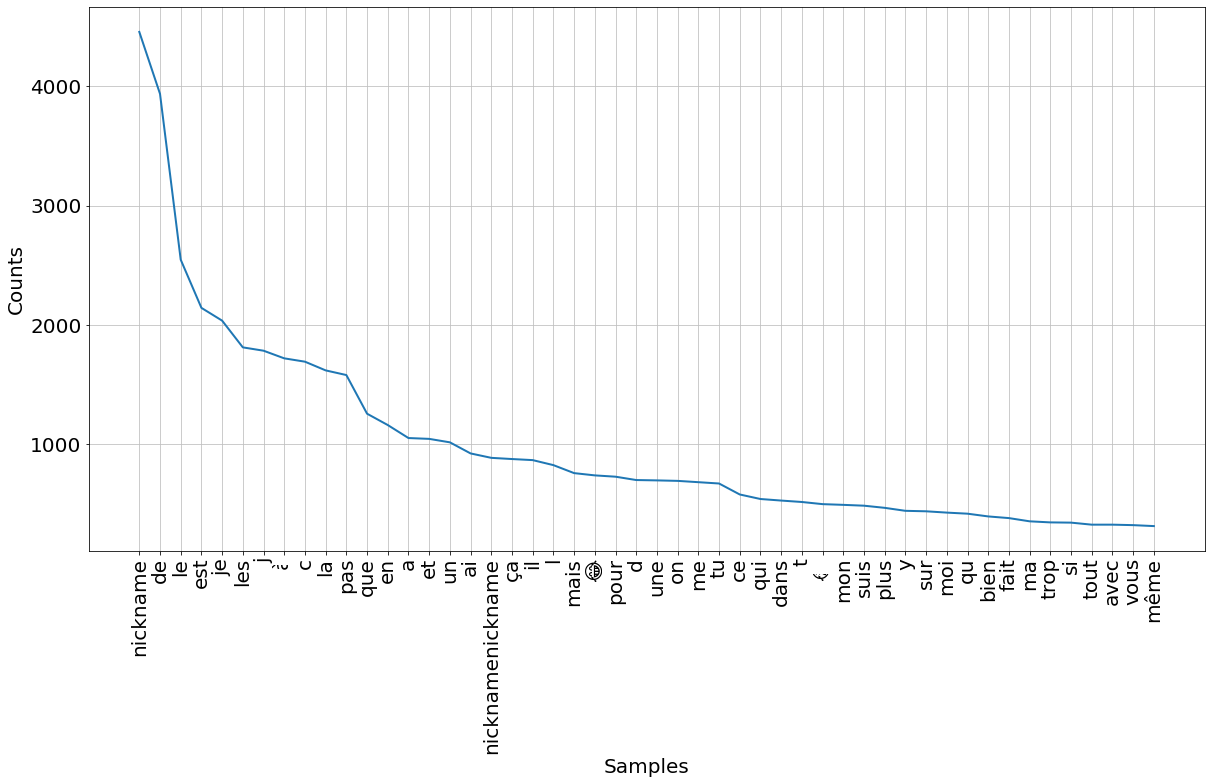

In [4]:
# Pour changer la taille des graphiques :
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 20

fdist = nltk.FreqDist(words)
print("Les 10 mots les plus communs sont :")
print(fdist.most_common(10))
fdist.plot(50)

# Sampling rate
On va simplifier un peu le corpus en enlevant certains mots. Pour cela on va faire un sous-échantillonnage du corpus pour supprimer certains mots. 

Pour chaque mot $w_i$ on note $z(w_i)$ la proportion d'apparition de ce mot, c'est-à-dire le rapport entre le nombre de fois que ce mot apparait et le nombre total de mots. La probabilité de garder un mot le mot $w_i$ est :
$$
\mathbb P(w_i) = \left(\sqrt{\frac{z(w_i)}{q}} + 1 \right)
\times
\frac{q}{z(w_i)}
$$
Le paramètre $q$ est appelé "sample" – échantillonnage – contrôle le nombre de sous-échantillonnages. La valeur par défaut est 0,001.

In [5]:
def calcul_proba(x):
    result = (sqrt(x)+1)*(1/x)
    return(result)
calcul_proba_v = np.vectorize(calcul_proba)

def sub_sampling(phrases, sample = 0.01):
    words = [item for sublist in phrases for item in sublist]
    fdist = nltk.FreqDist(words)
    vocabulary = list(set(words))
    proportion = np.array([(fdist[w]/ (len(words) * sample)) for w in vocabulary])
    probabilities_subsampling = calcul_proba_v(proportion)
    nouveau_corpus = [] 

    for phrase in phrases: #on parcourt tous les articles du corpus
        nouveau_corpus.append([]) #on crée une sous liste à chaque nouvel article
        for word in phrase: #et pour tous les mots de l'article
        # Les mots à supprimer sont les mots tels que la loi générée U([0,1]) soit > proba
        # On garde donc les mots si U([0,1]) <= proba
            proba_w = probabilities_subsampling[vocabulary.index(word)]
            if np.random.uniform(low=0.0, high=1.0) <= proba_w:
                nouveau_corpus[-1].append(word)
    return(nouveau_corpus)


phrases2 = sub_sampling(phrases)
print(phrases[0:10])
print(phrases2[0:10])

[['il', 'mérite', 'd', 'être', 'bloquer', 'la', 'lettre', 'de', 'l', 'alphabet'], ['nickname', 'et', 'fière', 'je', 't', 'en', 'voi', 'att', 'j', 'avais', 'oublié'], ['il', 'est', '1', 'heure'], ['eeeeh', 'jfais', 'la', 'go', 'qui', 'a', 'de', 'les', 'programmes', 'mais', 'j', 'ai', 'même', 'pas', 'de', 'navigo', 'ptdddddr', '😭'], ['en', 'tout', 'cas', 'la', 'demoiselle', 'a', 'bien', 'raison'], ['le', 'rathalos', 'est', 'un', 'gros', 'fils', 'de', 'pute', 'bonne', 'nuit'], ['nickname', 'et', 'puis', 'un', 'jour', 'pfffffffffus', 'rien', 'ne', 'fonctionne', 'l', 'humain', 'se', 'meurt', 'à', 'petit', 'feu'], ['nickname', 'je', 'veux', 'pas', 'en', 'savoir', 'sasuke', 'j', 'sais', 'pas', 'qui', 'c', 'est', 'mais', 'j', 'crois', 'il', 'est', 'sombre'], ['à', 'partir', 'de', 'quand', 'peut', 'on', 'se', 'qualifier', 'de', 'fan'], ['go', 'profité', 'de', 'les', '6h20', 'de', 'sommeil', 'qu', 'il', 'me', 'reste']]
[['il', 'mérite', 'd', 'être', 'bloquer', 'la', 'lettre', 'l', 'alphabet'], [

# Génération de l'échantillon de test
Comment on gère les doublons ?

In [79]:
phrase = phrases[1]
window = 2
focus = list(range(0, len(phrase)))
focus = random.choice(focus)
print(focus)
i = focus
index_i = vocabulary.index(phrase[i])
        
i_contexte = list(range(max(i-window,0), min(i+window+1, len(phrase))))
i_contexte.remove(i)
print(i_contexte)
i_contexte = random.choice(i_contexte)
print(i_contexte)

8
[6, 7, 9, 10]
6


In [87]:
#words = [item for sublist in phrases2 for item in sublist]
#vocabulary = list(vocabulary)
# On enlève les phrases d'un seul mot
words = [item for sublist in phrases for item in sublist]
vocabulary = list(set(words))
def create_sample(phrases, vocabulary, window = 2):
    phrases = [phrase for phrase in phrases if len(phrase)>1]
    test_sample = []
    for phrase in phrases:
        focus = list(range(0, len(phrase)))
        focus = random.choice(focus)
        #for i in focus: # boucle non utile car on ne prend qu'un mot
        i = focus
        index_i = vocabulary.index(phrase[i])
        
        
        i_contexte = list(range(max(i-window,0), min(i+window+1, len(phrase))))
        i_contexte.remove(i)
        i_contexte = random.choice(i_contexte)
            #for j in i_contexte: # boucle non utile on en prend qu'un mot
        j = i_contexte
        index_j = vocabulary.index(phrase[j])
        test_sample.append([index_i, index_j])
    return(test_sample)
def create_sample_word(phrases, vocabulary, window = 2):
    test_sample = []
    for phrase in phrases:
        focus = list(range(0, len(phrase)))
        focus = random.choice(focus)
        for i in focus:
            i_contexte = list(range(max(i-window,0), min(i+window+1, len(phrase))))
            i_contexte.remove(i) # faire ici un tirage
            i_contexte = random.choice(i_contexte)
            for j in i_contexte:
                test_sample.append([phrase[i], phrase[j]])
    return(test_sample)

test_sample = create_sample(phrases, vocabulary)
#test_sample_w = create_sample_word(phrases, vocabulary)
#test_sample_w[:10]
test_sample[:10]

[[6614, 89],
 [8262, 11620],
 [6614, 6420],
 [5250, 9399],
 [12971, 11080],
 [898, 11248],
 [8999, 7863],
 [5856, 5649],
 [11608, 2926],
 [10868, 6312]]

# Algorithme
Si on note $\theta$ le paramètre à estimer, $L(\theta)$ la fonction de perte et $\eta$ le taux d'apprentissage (*learning rate*) alors :
$$
\theta^{(t+1)} = \theta^{(t)} - \eta \nabla_\theta L(\theta)
$$

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd

dim = 10
epoch = 1
learning_rate = 0.001
#test_sample = create_sample(phrases, vocabulary)

# Attention: torch.rand génère une loi uniforme et torch.randn une loi normale
input = torch.randn(len(vocabulary), dim, requires_grad=True).float()
output = torch.randn(len(vocabulary), dim, requires_grad=True).float()
input = autograd.Variable(input, requires_grad=True)
output = autograd.variable(output, requires_grad=True)

#nn.MSELoss(log_probs.view(1, -1), autograd.Variable(output[target,]))

#input = input - learning_rate * input.grad
#output = output - learning_rate * input.grad
#for context, target in test_sample:
#print(input)
loss_tot = []
for i in range(epoch):
    compteur = 0
    print(i)
    test_sample = create_sample(sub_sampling(phrases), vocabulary)
    for context, target in test_sample:
        compteur+=1
        # Multiplication matricielle: 
        data = torch.matmul(input[context,], torch.t(output))
        proba = F.softmax(data, dim=0)
        log_probs = F.log_softmax(data, dim=0)
        loss = F.nll_loss(log_probs.view(1,-1), torch.tensor([target]).long())
        #print(loss)
        loss_tot.append([loss.data])
        # Pour ensuite dériver les matrices par rapport à la loss
        loss.backward()
        
        # Il faut modifier juste le .data pour ne pas perdre la structure
        input.data = input.data - learning_rate * input.grad.data
        output.data = output.data - learning_rate * output.grad.data
        
        input.grad.data.zero_()
        output.grad.data.zero_()
#print(input)        
 

0
1
2
3
4
5
6
7
8
9


9903


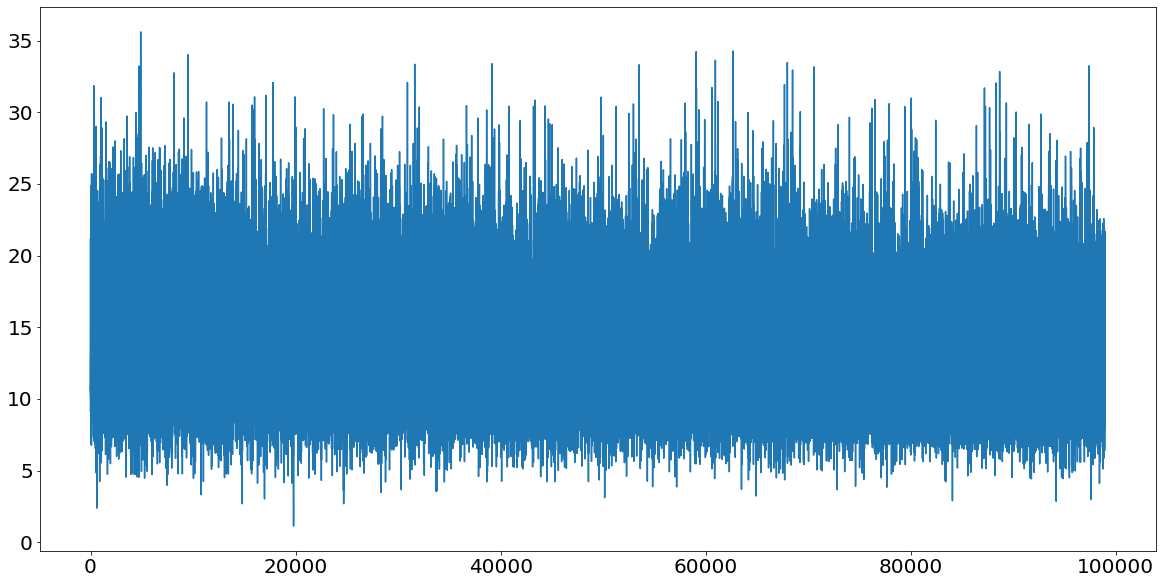

In [94]:
print(len(test_sample))
from matplotlib import pyplot as plt
plt.plot(loss_tot)

In [59]:
10 % 10

0

In [69]:
random.choice([3,8])

3